<font size="6">Exercise </font>

<font size="4">Exercise 1: Use Normet to normalize the NO<sub>2</sub> data from the MY1 station using one-step normalization process. You can utilize the new model configuration to save time, but you are also encouraged to design your own configuration to test for differences.</font>

In [ ]:
# load into google drive
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
os.chdir('/content/drive/My Drive/Colab Notebooks/DEES_first_year/weather_normalization_course/scripts/')

<font size="5">1: Load the MY1 data </font>

In [5]:
import pandas as pd
# normet package contains the weather normalization function which is friendly for users
import normet as nm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import time
import seaborn as sns
# load the pollution data
df=pd.read_csv('../dataset/MY1.csv',parse_dates=['date'],index_col='date')
# the columns of this dataframe - df
print(df.columns)
# preview the first 5 lines of the loaded data 
df.head()

Index(['O3', 'NO', 'NO2', 'SO2', 'CO', 'PM10', 'location_type', 'PM2.5',
       'temp', 'v10', 'ssrd', 'blh', 'sp', 'rh2m', 'u10', 'tp'],
      dtype='object')


/var/folders/8p/ny4s42v97yz7qg_ysw7z_rm00000gp/T/ipykernel_25385/2745722845.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv('../dataset/MY1.csv',parse_dates=['date'],index_col='date')


,O3,NO,NO2,SO2,CO,PM10,location_type,PM2.5,temp,v10,ssrd,blh,sp,rh2m,u10,tp
date,,,,,,,,,,,,,,,,
2010-10-13 12:00:00,22.0,61.0,88.0,5.0,0.3,22.0,Urban Traffic,16.0,9.0,-2.915381,1032762.56,823.39966,101350.99,74.64452,-1.647905,0.0
2010-10-13 13:00:00,28.0,45.0,69.0,5.0,0.2,22.0,Urban Traffic,10.0,9.0,-3.091130,883327.20,834.39100,101301.67,72.99228,-1.395934,0.0
2010-10-13 14:00:00,24.0,50.0,76.0,5.0,0.3,26.0,Urban Traffic,10.0,8.8,-3.433254,1038951.25,857.62600,101267.99,72.24144,-1.281452,0.0
2010-10-13 15:00:00,26.0,43.0,71.0,5.0,0.3,24.0,Urban Traffic,10.0,8.6,-3.658799,710545.70,850.04333,101246.85,71.95577,-1.228140,0.0
2010-10-13 16:00:00,26.0,43.0,76.0,5.0,0.5,22.0,Urban Traffic,12.0,8.4,-3.668172,333183.62,846.91284,101236.37,71.84961,-1.210743,0.0


<font size="5">2: One step weather normalization </font>
<font size="4">

Tips:
1. Use the `new_model_config` or design your own `model_config`.
2. Apply Normet's `do_all` function to perform one-step weather normalization (pay attention to the shuffle number; higher shuffle times may significantly increase processing time; don't forget the model performance).
3. It is recommended to visualize the normalized data.
</font>


In [150]:
new_model_config = {
    'time_budget': 100,                     # Total running time in seconds
    'metric': 'r2',                        # Primary metric for regression, 'mae', 'mse', 'r2', 'mape',...
    'estimator_list': ["lgbm", "rf", "xgboost", "extra_tree", "xgb_limitdepth"],            # List of ML learners: "lgbm", "rf", "xgboost", "extra_tree", "xgb_limitdepth"
    'task': 'regression',                  # Task type
    'eval_method': 'auto',                 # A string of resampling strategy, one of ['auto', 'cv', 'holdout'].
    'verbose': True                     # Print progress messages
}

In [151]:
start_time = time.time()
df_dew_no2, mod_stats_no2=nm.do_all(df,value='NO2',feature_names=['u10', 'tp', 'v10', 'ssrd', 'blh', 'temp', 'sp','rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'tp', 'v10', 'ssrd', 'blh', 'temp', 'sp','rh2m'],model_config=new_model_config,n_samples=300)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-08-18 04:41:48 : Training AutoML...
2024-08-18 04:43:38 : Best model is lgbm with best model parameters of {'n_estimators': 180, 'num_leaves': 484, 'min_child_samples': 36, 'learning_rate': 0.1594316824645424, 'log_max_bin': 8, 'colsample_bytree': 0.9882716197099741, 'reg_alpha': 0.004676080321450302, 'reg_lambda': 0.5377255028869998}
2024-08-18 04:43:39 : Normalising the dataset using the trained model in parallel.
2024-08-18 04:45:25 : Aggregating 300 predictions...
Execution time: 217.41 seconds


<Axes: xlabel='date'>

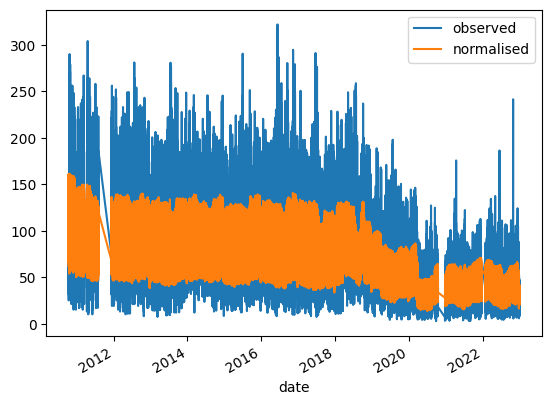

In [152]:
df_dew_no2.plot()

<font size="4">Exercise 2: Use Normet to normalize the NO<sub>2</sub> data from the MY1 station in 2019 using a one-step normalization process. You can utilize the new model configuration to save time, but you are also encouraged to design your own configuration to test for differences.</font>

In [7]:
df2019=df[(df.index.year == 2019)]
df2019

,O3,NO,NO2,SO2,CO,PM10,location_type,PM2.5,temp,v10,ssrd,blh,sp,rh2m,u10,tp
date,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,27.54066,27.59697,52.38422,1.89695,0.251524,26.3,Urban Traffic,20.4,5.5,0.300235,-1.875,379.22340,102624.440,85.955440,3.118221,9.760000e-07
2019-01-01 01:00:00,32.26382,23.98922,46.65609,2.01192,0.251524,20.7,Urban Traffic,20.1,4.6,0.461923,-1.875,291.84900,102602.440,86.403240,2.998127,4.880000e-07
2019-01-01 02:00:00,38.56690,21.54110,43.57085,1.94007,0.215171,12.5,Urban Traffic,9.7,4.4,0.361747,-1.875,263.67493,102614.125,86.999664,3.092967,0.000000e+00
2019-01-01 03:00:00,48.49551,10.40158,25.62631,1.33649,0.173905,10.8,Urban Traffic,8.9,4.1,0.106325,-1.875,263.39660,102601.234,87.812280,3.282647,0.000000e+00
2019-01-01 04:00:00,34.92475,16.79714,40.18036,1.55205,0.250542,11.1,Urban Traffic,9.9,4.0,-0.126249,-1.875,272.16187,102584.050,88.209900,3.479622,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,8.93076,42.60254,44.03810,3.02685,0.133817,27.9,Urban Traffic,22.6,5.0,0.480084,-1.875,503.32837,102358.060,100.335340,-4.073337,9.760000e-07
2019-12-31 20:00:00,11.17592,49.92257,44.75126,3.22864,0.165135,26.9,Urban Traffic,18.7,4.5,0.758353,-1.875,493.51965,102341.734,100.179000,-4.141801,2.200000e-06
2019-12-31 21:00:00,10.87657,39.91854,40.96164,3.02685,0.159441,30.1,Urban Traffic,20.2,2.9,1.423855,-1.875,486.07605,102328.330,99.785250,-3.943703,2.440000e-06


In [155]:
start_time = time.time()
df_dew_2019, mod_stats_2019,automl_2019=nm.do_all(df2019,value='NO2',feature_names=['u10', 'tp', 'v10', 'ssrd', 'blh', 'temp', 'sp','rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'tp', 'v10', 'ssrd', 'blh', 'temp', 'sp','rh2m'],model_config=new_model_config,n_samples=300,return_model=True)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-08-18 04:45:26 : Training AutoML...
2024-08-18 04:47:08 : Best model is xgboost with best model parameters of {'n_estimators': 84, 'max_leaves': 184, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-08-18 04:47:08 : Normalising the dataset using the trained model in parallel.
2024-08-18 04:47:10 : Aggregating 300 predictions...
Execution time: 104.57 seconds


In [156]:
df_dew_2019

,observed,normalised
date,,
2019-01-01 00:00:00,52.38422,52.240528
2019-01-01 01:00:00,46.65609,46.707287
2019-01-01 02:00:00,43.57085,45.209160
2019-01-01 03:00:00,25.62631,43.830990
2019-01-01 04:00:00,40.18036,46.833305
...,...,...
2019-12-31 19:00:00,44.03810,52.224258
2019-12-31 20:00:00,44.75126,51.716961
2019-12-31 21:00:00,40.96164,51.233635


In [157]:
start_time = time.time()
df_dew_2019a, mod_stats_2019a,automl_2019a=nm.do_all(df2019,value='NO2',feature_names=['u10', 'tp', 'v10', 'ssrd', 'blh', 'temp', 'sp','rh2m', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'tp', 'v10', 'ssrd', 'blh', 'temp', 'sp','rh2m'],model_config=new_model_config,n_samples=300,return_model=True)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-08-18 04:47:10 : Training AutoML...
2024-08-18 04:48:53 : Best model is xgboost with best model parameters of {'n_estimators': 84, 'max_leaves': 184, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-08-18 04:48:53 : Normalising the dataset using the trained model in parallel.
2024-08-18 04:48:55 : Aggregating 300 predictions...
Execution time: 104.41 seconds


In [158]:
df_dew_2019a

,observed,normalised
date,,
2019-01-01 00:00:00,52.38422,51.979893
2019-01-01 01:00:00,46.65609,44.449005
2019-01-01 02:00:00,43.57085,42.472198
2019-01-01 03:00:00,25.62631,41.360600
2019-01-01 04:00:00,40.18036,45.830086
...,...,...
2019-12-31 19:00:00,44.03810,54.438515
2019-12-31 20:00:00,44.75126,52.783394
2019-12-31 21:00:00,40.96164,53.093208


In [159]:
importances = automl_2019.feature_importances_
feature_names = automl_2019.feature_names_in_

print(importances)
print(feature_names)

[0.08937755 0.02756967 0.01816038 0.2637257  0.0991143  0.0451112
 0.04067754 0.02337249 0.02892316 0.08119944 0.09453189 0.18823665]
['weekday' 'u10' 'tp' 'v10' 'ssrd' 'blh' 'temp' 'sp' 'rh2m' 'date_unix'
 'day_julian' 'hour']


In [162]:
from numpy.linalg import cond
df2019['date_unix'] = df2019.index.astype(np.int64) // 10**9
df2019['day_julian'] = pd.DatetimeIndex(df2019.index).dayofyear
X = df2019[['date_unix', 'day_julian']].values
condition_number = cond(X)
print(f"Condition Number: {condition_number}")


Condition Number: 14323747.18064545


/var/folders/8p/ny4s42v97yz7qg_ysw7z_rm00000gp/T/ipykernel_12731/873464787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['date_unix'] = df2019.index.astype(np.int64) // 10**9
/var/folders/8p/ny4s42v97yz7qg_ysw7z_rm00000gp/T/ipykernel_12731/873464787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['day_julian'] = pd.DatetimeIndex(df2019.index).dayofyear


In [163]:
correlation = df2019['date_unix'].corr(df2019['day_julian'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.9999965365017898


<font size="4">Exercise 3: Use Normet to normalize the daily NO<sub>2</sub> data from the MY1 station using a one-step normalization process.</font>


In [164]:
df.pop('location_type')  # Remove the 'location_type' column from df
df_daily = df.resample('D').mean()



In [165]:
start_time = time.time()
df_dew_day, mod_stats_day,automl_day=nm.do_all(df_daily,value='NO2',feature_names=['u10', 'tp', 'v10', 'ssrd', 'blh', 'temp', 'sp','rh2m','date_unix', 'day_julian', 'weekday'],
                                               variables_resample=['u10', 'tp', 'v10', 'ssrd', 'blh', 'temp', 'sp','rh2m'],model_config=new_model_config,n_samples=300,return_model=True)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-08-18 04:52:36 : Training AutoML...
2024-08-18 04:54:17 : Best model is lgbm with best model parameters of {'n_estimators': 597, 'num_leaves': 17, 'min_child_samples': 16, 'learning_rate': 0.09360027853198624, 'log_max_bin': 10, 'colsample_bytree': 0.8075404592869626, 'reg_alpha': 0.9932361033083701, 'reg_lambda': 0.0017268087317790079}
2024-08-18 04:54:17 : Normalising the dataset using the trained model in parallel.
2024-08-18 04:54:36 : Aggregating 300 predictions...
Execution time: 119.58 seconds


[ 212  979  751 1085  903  923  888  798  829 1323  861]
['weekday' 'u10' 'tp' 'v10' 'ssrd' 'blh' 'temp' 'sp' 'rh2m' 'date_unix'
 'day_julian']


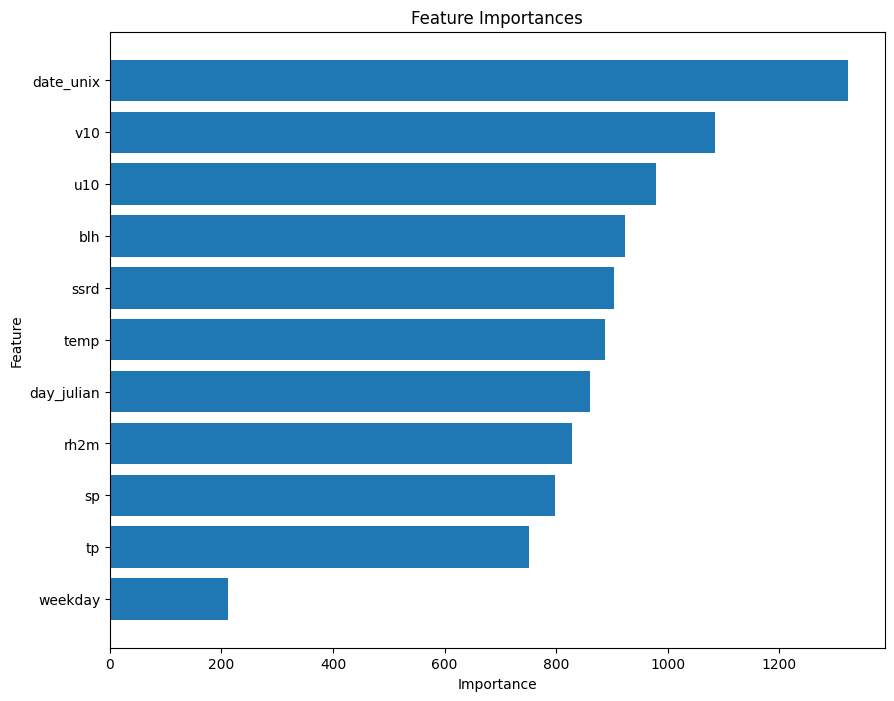

In [166]:
# Are the feature importances the same for daily and hourly data? - Run it yourself and compare.
importances = automl_day.feature_importances_
feature_names = automl_day.feature_names_in_
indices = np.argsort(importances)
print(importances)
print(feature_names)
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

<Axes: xlabel='date'>

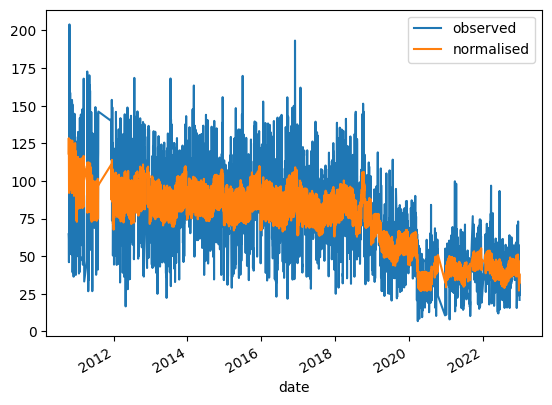

In [167]:
df_dew_day.plot()

In [168]:
mod_stats_day

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,973,1.0,0.055324,7.357899,7.294070e-04,0.097009,9.737167,0.948762,***,0.711375,0.855687,0.900150,testing
1,2919,1.0,-0.000017,1.936610,-2.246070e-07,0.025347,2.616385,0.996698,***,0.927141,0.963571,0.993407,training
2,3892,1.0,0.013818,3.291932,1.811882e-04,0.043165,5.370029,0.985497,***,0.874875,0.937438,0.971205,all


<font size="4">Exercise 4: Experiment with other pollutants or scenarios in any way you like.</font>
